# Анализ рынка недвижимости

## Обзор данных

In [1]:
# импорт библиотек
import pandas as pd
import seaborn as sns
from pylab import rcParams
import plotly.express as px
import plotly.io as pio
from plotly import graph_objects as go
from plotly.subplots import make_subplots

In [2]:
# настройки для графиков
%config InlineBackend.figure_format = 'retina'
pio.renderers.default = 'svg'
svg_renderer = pio.renderers['svg']
svg_renderer.scale = 1.2
colors = ['#fbb4ae', '#b3cde3', '#ccebc5', '#decbe4', '#fed9a6', '#ffffcc', '#e5d8bd', '#fddaec', '#f2f2f2', '#b3e2cd', '#fdcdac', '#cbd5e8', '#f4cae4', '#e6f5c9', '#fff2ae', '#f1e2cc', '#cccccc']

In [3]:
# открытие файлов
data = pd.read_excel('test_task.xlsx', sheet_name='data')
categories = pd.read_excel('test_task.xlsx', sheet_name='categories')

In [4]:
# вывод основной информации о датафреймах
dfs = [data, categories]

def df_info(data: pd.DataFrame):
    print('Первые 10 строк датафрейма')
    display(data.head(10))
    print('Основная информация о датафрейме')
    display(data.info())

for df in dfs:
    df_info(df)

Первые 10 строк датафрейма


,Calculation1,Компания,Категория,Регион,Тип сделки,Категория недвижимости,Рубрика,Неделя,Контент
0,1,Игрок 1,Большое агенство (201-1000),Челябинск,Аренда,Городская,Долгосрочная,С 2018-01-01 до 2018-01-07,69
1,2,Игрок 1,Большое агенство (201-1000),Челябинск,Аренда,Городская,Долгосрочная,С 2018-01-08 до 2018-01-14,63
2,3,Игрок 1,Большое агенство (201-1000),Челябинск,Аренда,Городская,Долгосрочная,С 2018-01-15 до 2018-01-21,81
3,4,Игрок 1,Большое агенство (201-1000),Челябинск,Аренда,Городская,Долгосрочная,С 2018-01-22 до 2018-01-28,86
4,5,Игрок 1,Большое агенство (201-1000),Челябинск,Аренда,Городская,Долгосрочная,С 2018-01-29 до 2018-02-04,86
5,6,Игрок 1,Большое агенство (201-1000),Челябинск,Аренда,Городская,Долгосрочная,С 2018-02-05 до 2018-02-11,101
6,7,Игрок 1,Большое агенство (201-1000),Челябинск,Аренда,Городская,Долгосрочная,С 2018-02-12 до 2018-02-18,102
7,8,Игрок 1,Большое агенство (201-1000),Челябинск,Аренда,Городская,Долгосрочная,С 2018-02-19 до 2018-02-25,47
8,9,Игрок 1,Большое агенство (201-1000),Челябинск,Аренда,Городская,Долгосрочная,С 2018-02-26 до 2018-03-04,106
9,10,Игрок 1,Большое агенство (201-1000),Челябинск,Аренда,Городская,Долгосрочная,С 2018-03-05 до 2018-03-11,113


Основная информация о датафрейме
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104412 entries, 0 to 104411
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Calculation1            104412 non-null  object
 1   Компания                104412 non-null  object
 2   Категория               104412 non-null  object
 3   Регион                  104412 non-null  object
 4   Тип сделки              104412 non-null  object
 5   Категория недвижимости  104412 non-null  object
 6   Рубрика                 104412 non-null  object
 7   Неделя                  104412 non-null  object
 8   Контент                 104412 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 7.2+ MB


None

Первые 10 строк датафрейма


,Категория,Сегмент
0,Большое агенство (201-1000),АН
1,Крупное агенство (1000+),АН
2,Крупный маклер (4-9),SMB
3,Малое агенство (10-50),SMB
4,Собственник (1),Owner
5,Среднее агенство (51-200),АН
6,Частный маклер (2-3),SMB


Основная информация о датафрейме
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Категория  7 non-null      object
 1   Сегмент    7 non-null      object
dtypes: object(2)
memory usage: 240.0+ bytes


None

Итак, в доступе 2 датасета: количество контента с разбивкой по компаниям, категориям, регионам, типам сделки, категориям недвижимости, рубрикам, неделям и соответствие сегментов категориям.

## Предобработка данных

Типы данных в столбцах определены корректно, однако, обнаружен лишний столбец с индексом, удалим его из датафрейма.

In [5]:
# удаление из датасета лишнего столбца
data = data.drop('Calculation1', axis=1)

Также, для удобства работы подгрузим сегменты из второго датасета в основную таблицу.

In [6]:
# объединение датафреймов
data = data.merge(categories, how='left', on='Категория')

Проверим измененный датасет.

In [7]:
data

,Компания,Категория,Регион,Тип сделки,Категория недвижимости,Рубрика,Неделя,Контент,Сегмент
0,Игрок 1,Большое агенство (201-1000),Челябинск,Аренда,Городская,Долгосрочная,С 2018-01-01 до 2018-01-07,69,АН
1,Игрок 1,Большое агенство (201-1000),Челябинск,Аренда,Городская,Долгосрочная,С 2018-01-08 до 2018-01-14,63,АН
2,Игрок 1,Большое агенство (201-1000),Челябинск,Аренда,Городская,Долгосрочная,С 2018-01-15 до 2018-01-21,81,АН
3,Игрок 1,Большое агенство (201-1000),Челябинск,Аренда,Городская,Долгосрочная,С 2018-01-22 до 2018-01-28,86,АН
4,Игрок 1,Большое агенство (201-1000),Челябинск,Аренда,Городская,Долгосрочная,С 2018-01-29 до 2018-02-04,86,АН
...,...,...,...,...,...,...,...,...,...
104407,Игрок 2,Частный маклер (2-3),Воронеж,Продажа,Загородная,Вторичка,С 2019-10-21 до 2019-10-27,283,SMB
104408,Игрок 2,Частный маклер (2-3),Воронеж,Продажа,Загородная,Вторичка,С 2019-10-28 до 2019-11-03,282,SMB
104409,Игрок 2,Частный маклер (2-3),Воронеж,Продажа,Загородная,Вторичка,С 2019-11-04 до 2019-11-10,279,SMB
104410,Игрок 2,Частный маклер (2-3),Воронеж,Продажа,Загородная,Вторичка,С 2019-11-11 до 2019-11-17,284,SMB


## Исследовательский анализ данных

### Анализ по регионам

Посмотрим на распределение контента по регионам.

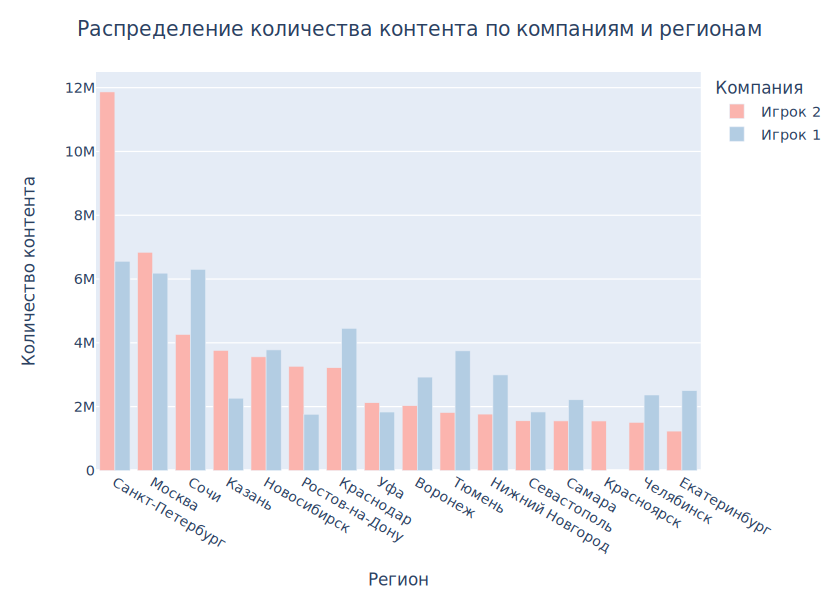

In [8]:
# создание таблицы с общим количеством контента по компаниям и регионам
df_region = data.groupby(['Регион', 'Компания'], as_index=False)['Контент'].sum().sort_values(by='Контент', ascending=False)

# построение столбчатой диаграммы
fig = px.bar(
    df_region, 
    x='Регион', 
    y='Контент',
    color='Компания',
    barmode='group',
    color_discrete_sequence=px.colors.qualitative.Pastel1
)

fig.update_layout(
    title='Распределение количества контента по компаниям и регионам',
    title_x=0.5,
    xaxis_title='Регион',
    yaxis_title='Количество контента'
)
fig.show()

В большинстве регионов по количеству объявлений лидирует Игрок 1. Однако, в двух самых крупных городах (Москве и Санкт-Петербурге) бОльшую долю занимает Игрок 2, преимущественно в Петербурге.

### Анализ по типам сделки

Сравним компании по типу сделки (аренда/продажа).

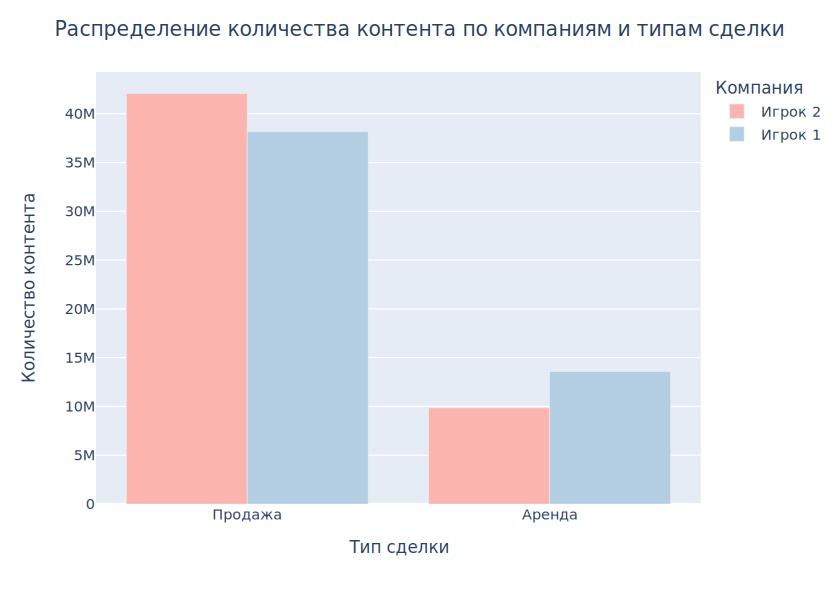

In [9]:
# создание таблицы с общим количеством контента по компаниям и типам сделки
df_type_deal = data.groupby(['Тип сделки', 'Компания'], as_index=False)['Контент'].sum().sort_values(by='Контент', ascending=False)

# построение столбчатой диаграммы 
fig = px.bar(
    df_type_deal, 
    x='Тип сделки', 
    y='Контент',
    color='Компания',
    barmode='group',
    color_discrete_sequence=px.colors.qualitative.Pastel1
)

fig.update_layout(
    title='Распределение количества контента по компаниям и типам сделки',
    title_x=0.5,
    xaxis_title='Тип сделки',
    yaxis_title='Количество контента'
)
fig.show()

По продаже недвижимости лидирует Игрок 2, а по аренде Игрок 1.

Посмотрим на процентное соотношение количества контента по типу сделки внутри каждой из компаний.

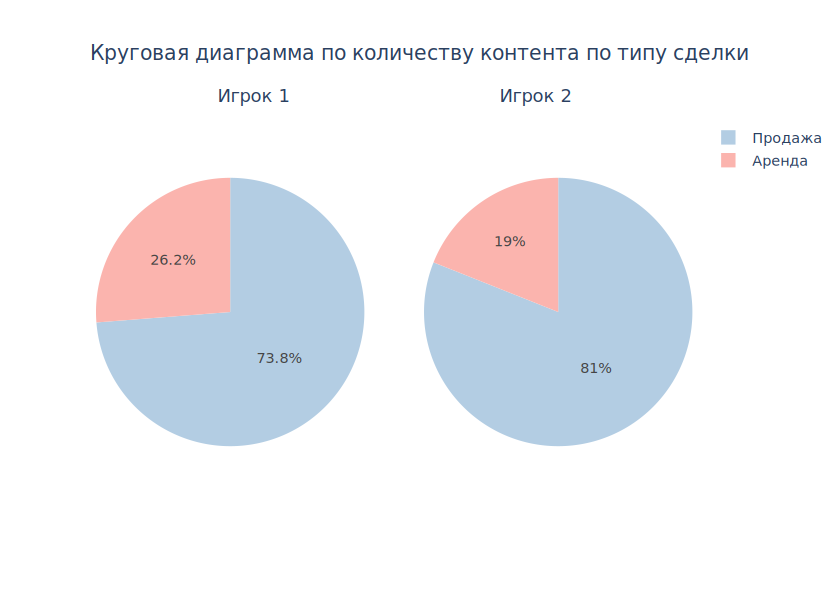

In [10]:
# создание таблиц с количеством контента по типам сделки
df_type_deal_1 = data.query('Компания == "Игрок 1"').groupby('Тип сделки', as_index=False)['Контент'].sum()
df_type_deal_2 = data.query('Компания == "Игрок 2"').groupby('Тип сделки', as_index=False)['Контент'].sum()

# построение круговой диаграммы
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=df_type_deal_1['Тип сделки'], values=df_type_deal_1['Контент'], marker=dict(colors=colors), name='Игрок 1'), 1, 1)

fig.add_trace(go.Pie(labels=df_type_deal_2['Тип сделки'], values=df_type_deal_2['Контент'], marker=dict(colors=colors), name='Игрок 2'), 1, 2)

fig.update_layout(
    title='Круговая диаграмма по количеству контента по типу сделки',
    title_x = 0.5,
    annotations=[dict(text='Игрок 1', x=0.2, y=1.1, font_size=15, showarrow=False),
                 dict(text='Игрок 2', x=0.8, y=1.1, font_size=15, showarrow=False)]
)

fig.show()

По сравнению с игроком 1 у компании "Игрок 2" большую долю по количеству контента занимает продажа недвижимости.

### Анализ по категориям недвижимости

Теперь детальнее посмотрим на разбивку по категориям недвижимости (городская/загородная).

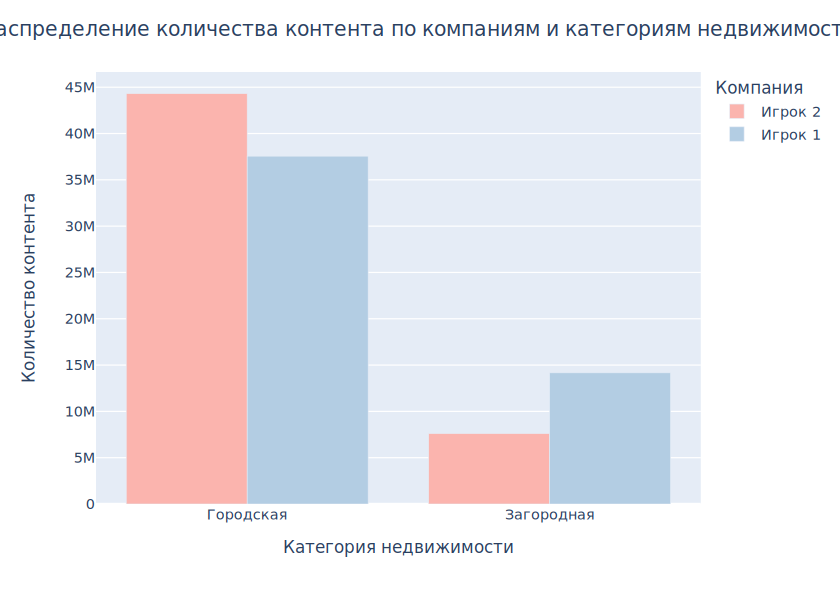

In [11]:
# создание таблицы с общим количеством контента по компаниям и категориям недвижимости
df_category = data.groupby(['Категория недвижимости', 'Компания'], as_index=False)['Контент'].sum().sort_values(by='Контент', ascending=False)

# построение столбчатой диаграммы 
fig = px.bar(
    df_category, 
    x='Категория недвижимости', 
    y='Контент',
    color='Компания',
    barmode='group',
    color_discrete_sequence=px.colors.qualitative.Pastel1
)

fig.update_layout(
    title='Распределение количества контента по компаниям и категориям недвижимости',
    title_x=0.5,
    xaxis_title='Категория недвижимости',
    yaxis_title='Количество контента'
)
fig.show()

Среди категорий недвижимости больше всего объявлений публикуется в городах и значительно меньше за городом.

### Анализ по сегментам клиентов

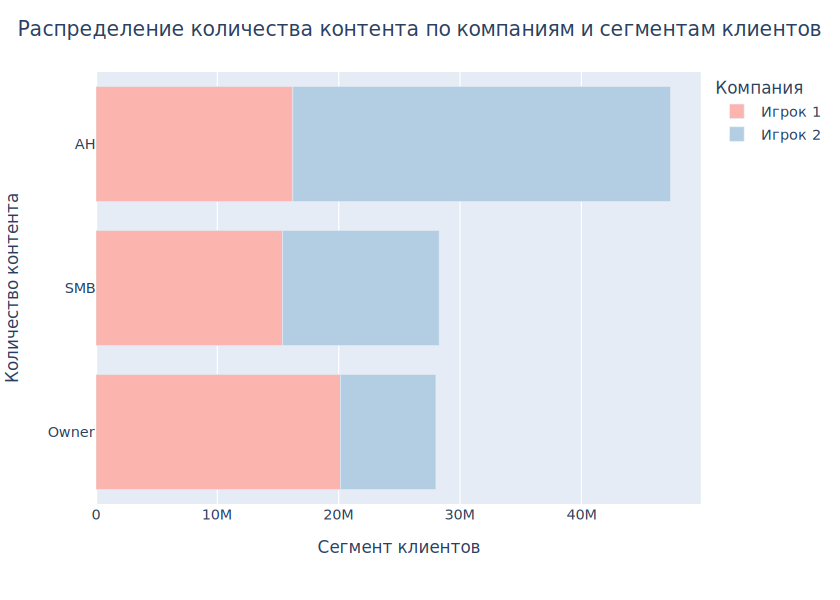

In [12]:
# создание таблицы с общим количеством контента по компаниям и сегментам
df_segment = data.groupby(['Сегмент', 'Компания'], as_index=False)['Контент'].sum()

# построение столбчатой диаграммы 
fig = px.bar(
    df_segment, 
    x='Контент', 
    y='Сегмент',
    color='Компания',
    color_discrete_sequence=px.colors.qualitative.Pastel1
)

fig.update_layout(
    title='Распределение количества контента по компаниям и сегментам клиентов',
    title_x=0.5,
    xaxis_title='Сегмент клиентов',
    yaxis_title='Количество контента'
)
fig.show()

Лидером среди сегментов является AH, в нем большую долю занимает Игрок 2. В сегментах малого и среднего бизнеса, а также среди собственников первое место по количеству объявлений принадлежит Игроку 1.

### Анализ в динамике

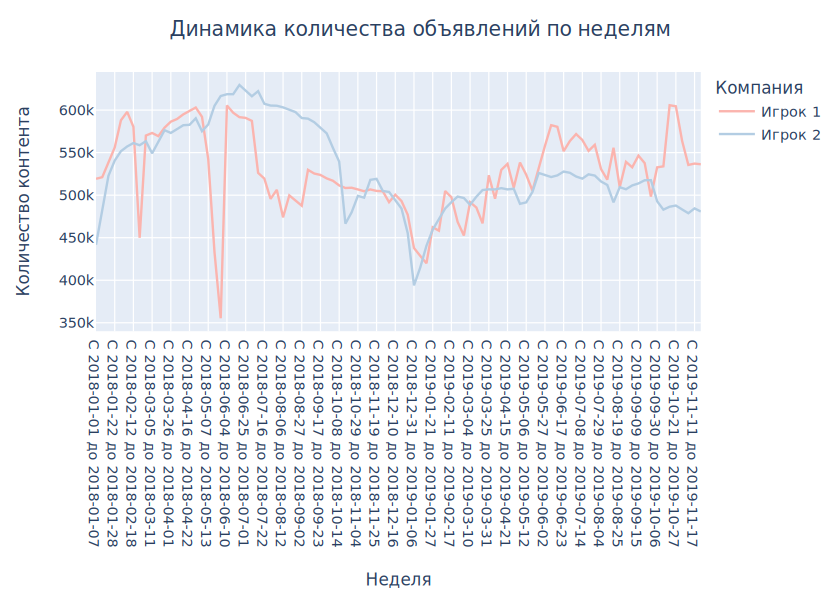

In [13]:
# создание таблицы с общим количеством контента по неделям с разбивкой по компаниям 
df_week = data.groupby(['Неделя', 'Компания'], as_index=False)['Контент'].sum()

# построение графика общего количества контента по неделям с разбивкой по компаниям 
fig = px.line(df_week, x='Неделя', y='Контент', color='Компания', color_discrete_sequence=colors)

fig.update_layout(
    title='Динамика количества объявлений по неделям',
    title_x=0.5,
    xaxis_title='Неделя',
    yaxis_title='Количество контента',
)

fig.show()

На графике наблюдается резкое падение количества объявлений у Игрока 1 на неделе с 28.05.2018 по 03.06.2018, с этого периода лидировал Игрок 2, но произошел резкий спад в октябре 2018 года. Также у обеих компаний наблюдается резкое падение в конце декабря 2018 - начале января 2019, что вероятнее всего обусловлено новогодними праздниками. Что касается последних недель, то Игрок 2 идет стабильнее, несмотря на то, что значение количества контента у компании ниже, чем у Игрока 1.

## Общий вывод

В ходе исследовательского анализа данных было рассмотрено количество объявлений по регионам, типам сделки, категориям недвижимости, сегментам клиентов, а также в динамике.

По результатам выполненной работы можно сделать ряд выводов:

- для Игрока 1 характерны не слишком крупные города, наблюдается больше объявлений на аренду недвижимости и за городом по сравнению с Игроком 2, больше всего компания работает с собственниками;
- Игрок 2 является лидером в Москве и Санкт-Петербурге, в продаже недвижимости, чаще в городах, среди сегментов клиентов сильнее всего выделяется AH;
- что касается динамики, то у обеих компаний на текущий момент (ноябрь 2019) идет падение в количестве контента, но у Игрока 1 значение на порядок выше;

Кроме того, для реальной оценки положения компаний на рынке недвижимости необходим более детальный анализ, учитывающий большее количество показателей, характеризующих эффективность их деятельности.